In [1]:
import numpy as np
import dgl

In [2]:
num = input("Enter number of sets needed: ")
num = int(num)

Enter number of sets needed: 3


In [3]:
def build_karate_club_graph():
    
    src = np.array([1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10,
        10, 11, 12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21,
        25, 25, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
    
    dst = np.array([0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4,
            5, 0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23,
            24, 2, 23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23,
            29, 30, 31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30,
            31, 32])

    addition = lambda x:x+35

    for ix in range(num-1):
        new_src = addition(src)
        new_dst = addition(dst)
        src = np.concatenate([src,new_src])
        dst = np.concatenate([dst,new_dst])

    #print(src)
    
    u = np.concatenate([src,dst])
    v = np.concatenate([dst,src])

    return dgl.DGLGraph((u,v))


In [4]:
G = build_karate_club_graph()
print(G.number_of_nodes())
print(G.number_of_edges())

104
624


In [5]:
import networkx as nx


In [6]:
nx_G = G.to_networkx().to_undirected()

In [7]:
nx_G

In [8]:
pos1 = nx.kamada_kawai_layout(nx_G)

C:\Users\Varun Sirpal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


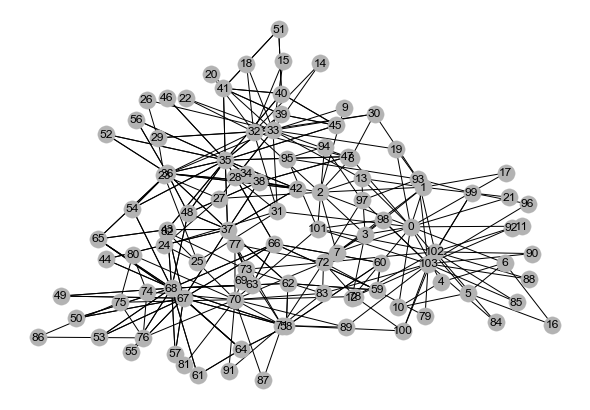

In [10]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
nx.draw(nx_G,pos1,with_labels=True,node_color=[[0.7,0.7,0.7]])
plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [12]:
embed = nn.Embedding(G.number_of_nodes(),6)

In [13]:
G.ndata['feat'] = embed.weight

In [14]:
print(G.ndata['feat'][[2,7]])

tensor([[-1.6232,  0.7919,  0.2980,  1.1284,  0.2825,  0.8595],
        [ 0.8037,  0.5020,  0.7463, -2.0733, -1.8903, -0.9099]],
       grad_fn=<IndexBackward>)


In [15]:
from dgl.nn.pytorch import GraphConv

In [16]:
class GCN(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(GCN,self).__init__()
        self.conv1 = GraphConv(input_size,hidden_size)
        self.conv2 = GraphConv(hidden_size,num_classes)
#         self.conv3 = GraphConv(hidden_size2,num_classes)
    
    def forward(self,G,inputs):
        h = self.conv1(G,inputs)
        h = torch.relu(h)  #ReLU Activation
        h = self.conv2(G,h)
        return h

In [17]:
#2 output classes to represent cluster of instructor(node 0) and 
#club president(node 34) of Karate Club
net = GCN(6,5,6)

In [18]:
inputs = embed.weight
labelled_nodes = torch.tensor([0,33,35,68, 70, 94])
labels = torch.tensor([0,1,2,3,4,5])

In [19]:
net

GCN(
  (conv1): GraphConv(in=6, out=5, normalization=both, activation=None)
  (conv2): GraphConv(in=5, out=6, normalization=both, activation=None)
)

In [20]:
net(G,inputs).detach()

tensor([[-0.4432,  0.6216,  0.0073, -0.4416, -0.5181,  0.3901],
        [-0.3336,  0.5403,  0.0227, -0.6438, -0.4180,  0.3053],
        [-0.3264,  0.2547, -0.1374, -0.4822, -0.4077,  0.3762],
        [-0.1805,  0.1619, -0.0639, -0.2132, -0.2067,  0.1794],
        [-0.0385,  0.0783,  0.0716,  0.0569, -0.1309,  0.2005],
        [-0.0509,  0.2155,  0.1412, -0.0553, -0.1555,  0.1980],
        [-0.0692,  0.3606,  0.2527,  0.2200, -0.1591,  0.1749],
        [-0.0969,  0.1787,  0.0253, -0.2107, -0.1364,  0.0866],
        [-0.1538,  0.1561, -0.0266, -0.1725, -0.2041,  0.1414],
        [-0.1457,  0.1195, -0.0744, -0.1479, -0.1257,  0.0109],
        [-0.0596,  0.2460,  0.2003,  0.3747, -0.1350,  0.1738],
        [ 0.0120,  0.0182,  0.0491,  0.0329, -0.0342,  0.0778],
        [-0.0896,  0.2195,  0.0583, -0.2206, -0.1320,  0.0709],
        [-0.1577,  0.2231, -0.0112, -0.2682, -0.1840,  0.0845],
        [-0.2479,  0.2130, -0.1213, -0.2704, -0.2175,  0.0372],
        [-0.2479,  0.2130, -0.1213, -0.2

In [21]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
for epoch in range(150):
    logits = net(G, inputs)
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labelled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 1.8580
Epoch 1 | Loss: 1.8140
Epoch 2 | Loss: 1.7747
Epoch 3 | Loss: 1.7387
Epoch 4 | Loss: 1.7052
Epoch 5 | Loss: 1.6739
Epoch 6 | Loss: 1.6462
Epoch 7 | Loss: 1.6192
Epoch 8 | Loss: 1.5925
Epoch 9 | Loss: 1.5660
Epoch 10 | Loss: 1.5392
Epoch 11 | Loss: 1.5122
Epoch 12 | Loss: 1.4849
Epoch 13 | Loss: 1.4565
Epoch 14 | Loss: 1.4278
Epoch 15 | Loss: 1.3983
Epoch 16 | Loss: 1.3683
Epoch 17 | Loss: 1.3376
Epoch 18 | Loss: 1.3064
Epoch 19 | Loss: 1.2744
Epoch 20 | Loss: 1.2419
Epoch 21 | Loss: 1.2081
Epoch 22 | Loss: 1.1737
Epoch 23 | Loss: 1.1390
Epoch 24 | Loss: 1.1036
Epoch 25 | Loss: 1.0678
Epoch 26 | Loss: 1.0323
Epoch 27 | Loss: 0.9972
Epoch 28 | Loss: 0.9629
Epoch 29 | Loss: 0.9292
Epoch 30 | Loss: 0.8964
Epoch 31 | Loss: 0.8643
Epoch 32 | Loss: 0.8331
Epoch 33 | Loss: 0.8026
Epoch 34 | Loss: 0.7728
Epoch 35 | Loss: 0.7438
Epoch 36 | Loss: 0.7155
Epoch 37 | Loss: 0.6878
Epoch 38 | Loss: 0.6610
Epoch 39 | Loss: 0.6352
Epoch 40 | Loss: 0.6101
Epoch 41 | Loss: 0.5857
Ep

In [22]:
logp[labelled_nodes]

tensor([[-6.2669e-03, -5.7291e+00, -1.4360e+01, -2.4315e+01, -5.8105e+00,
         -1.4113e+01],
        [-5.7346e+00, -3.2495e-03, -1.9094e+01, -1.9975e+01, -1.5521e+01,
         -1.1345e+01],
        [-1.2858e+01, -1.2104e+01, -7.0856e-03, -5.6794e+00, -6.5628e+00,
         -6.1081e+00],
        [-1.7841e+01, -1.4069e+01, -5.2343e+00, -5.3476e-03, -1.5184e+01,
         -1.3411e+01],
        [-5.1187e+00, -1.0565e+01, -5.5769e+00, -1.7262e+01, -1.0982e-02,
         -6.7866e+00],
        [-1.0503e+01, -9.4313e+00, -5.9399e+00, -1.3372e+01, -5.2330e+00,
         -8.1120e-03]], grad_fn=<IndexBackward>)

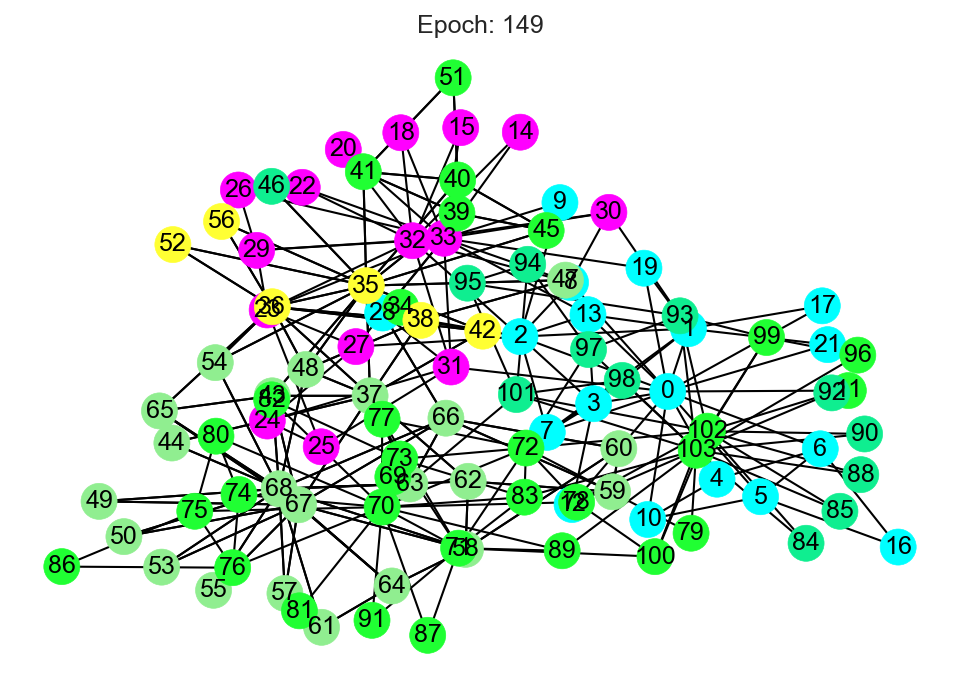

In [23]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    node_colors = ['#00FFFF','#FF00FF','#FFFF33','#90EE90','#20FF33','#0FEE90']
    
    pos = {}
    colors = []
    for v in range(G.number_of_nodes()):
        pos[v] = all_logits[i][v].numpy()  # i = no. of epoch, v = no. of node
        cls = pos[v].argmax()
        colors.append(node_colors[cls])
        #colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(nx_G, pos1, node_color=colors,with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(149)